In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, Dropdown
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import entropy
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from statsmodels.stats.contingency_tables import Table2x2

In [11]:
# Load data
Ohtani = pd.read_csv("ohtani_data.csv")
Ohtani

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
0,FF,2023-08-23,94.2,-1.98,5.78,"Ohtani, Shohei",687952,660271,NaN,foul,...,2,0,2,Standard,Standard,204.0,0.000,0.000,NaN,NaN
1,ST,2023-08-23,76.1,-2.01,5.74,"Ohtani, Shohei",687952,660271,NaN,swinging_strike,...,2,0,2,Standard,Standard,65.0,0.000,-0.064,NaN,NaN
2,ST,2023-08-23,77.2,-2.05,5.60,"Ohtani, Shohei",687952,660271,NaN,swinging_strike,...,2,0,2,Standard,Standard,69.0,0.000,-0.072,NaN,NaN
3,FS,2023-08-23,90.1,-1.94,5.69,"Ohtani, Shohei",687952,660271,NaN,ball,...,2,0,2,Standard,Standard,317.0,0.000,0.063,NaN,NaN
4,FS,2023-08-23,90.0,-1.83,5.76,"Ohtani, Shohei",687952,660271,NaN,blocked_ball,...,2,0,2,Standard,Standard,191.0,0.000,0.042,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089,ST,2023-03-30,84.3,-2.30,5.73,"Ohtani, Shohei",668843,660271,NaN,called_strike,...,0,0,0,Standard,Standard,72.0,0.000,-0.054,NaN,NaN
2090,FF,2023-03-30,95.9,-1.96,5.88,"Ohtani, Shohei",643393,660271,walk,ball,...,0,0,0,Standard,Standard,210.0,0.036,0.155,NaN,NaN
2091,FF,2023-03-30,96.4,-1.95,5.88,"Ohtani, Shohei",643393,660271,NaN,ball,...,0,0,0,Standard,Standard,216.0,0.000,0.135,NaN,NaN
2092,ST,2023-03-30,82.8,-2.27,5.73,"Ohtani, Shohei",643393,660271,NaN,ball,...,0,0,0,Standard,Standard,69.0,0.000,0.064,NaN,NaN


In [13]:
Cole = pd.read_csv("cole_data.csv")
Cole

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
0,FF,2023-09-27,96.1,-2.01,5.76,"Cole, Gerrit",666182,543037,field_out,hit_into_play,...,0,0,6,Strategic,Standard,212,0.000,-0.100,NaN,NaN
1,SL,2023-09-27,89.2,-2.05,5.77,"Cole, Gerrit",666182,543037,NaN,ball,...,0,0,6,Strategic,Standard,137,0.000,0.012,NaN,NaN
2,FF,2023-09-27,96.9,-2.16,5.74,"Cole, Gerrit",666182,543037,NaN,called_strike,...,0,0,6,Strategic,Standard,213,0.000,-0.017,NaN,NaN
3,FC,2023-09-27,91.0,-2.07,5.82,"Cole, Gerrit",543807,543037,field_out,hit_into_play,...,0,0,6,Strategic,Standard,180,-0.001,-0.169,NaN,NaN
4,FF,2023-09-27,97.1,-2.10,5.83,"Cole, Gerrit",595281,543037,strikeout,swinging_strike,...,0,0,6,Infield shade,Standard,208,-0.002,-0.214,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,FF,2023-03-30,96.7,-1.89,5.91,"Cole, Gerrit",624424,543037,NaN,foul,...,0,0,0,Standard,Standard,214,0.000,-0.054,NaN,NaN
3277,FF,2023-03-30,94.4,-1.74,6.03,"Cole, Gerrit",664774,543037,walk,ball,...,0,0,0,Infield shade,Standard,207,-0.036,0.155,NaN,NaN
3278,FF,2023-03-30,96.4,-1.67,6.03,"Cole, Gerrit",664774,543037,NaN,ball,...,0,0,0,Infield shade,Standard,222,0.000,0.135,NaN,NaN
3279,FF,2023-03-30,95.0,-1.69,6.07,"Cole, Gerrit",664774,543037,NaN,ball,...,0,0,0,Infield shade,Standard,208,0.000,0.064,NaN,NaN


In [12]:
Ohtani_pitch_type_table = Ohtani['pitch_type'].value_counts().reset_index()
Ohtani_pitch_type_table.columns = ['pitch_type', 'count']

Ohtani_pitch_type_table

,pitch_type,count
0,ST,737
1,FF,690
2,FC,329
3,FS,131
4,SI,126
5,CU,76
6,SL,5


In [14]:
Cole_pitch_type_table = Cole['pitch_type'].value_counts().reset_index()
Cole_pitch_type_table.columns = ['pitch_type', 'count']

Cole_pitch_type_table

,pitch_type,count
0,FF,1739
1,SL,683
2,KC,396
3,CH,233
4,FC,230


Methods:
- LASSO estimation
- MCE heatmap and network of 12 feature
- Odds evolutions w.r.t features.
- Scatter plot
- Homomorphic 2D snapshot of 3D manifolds

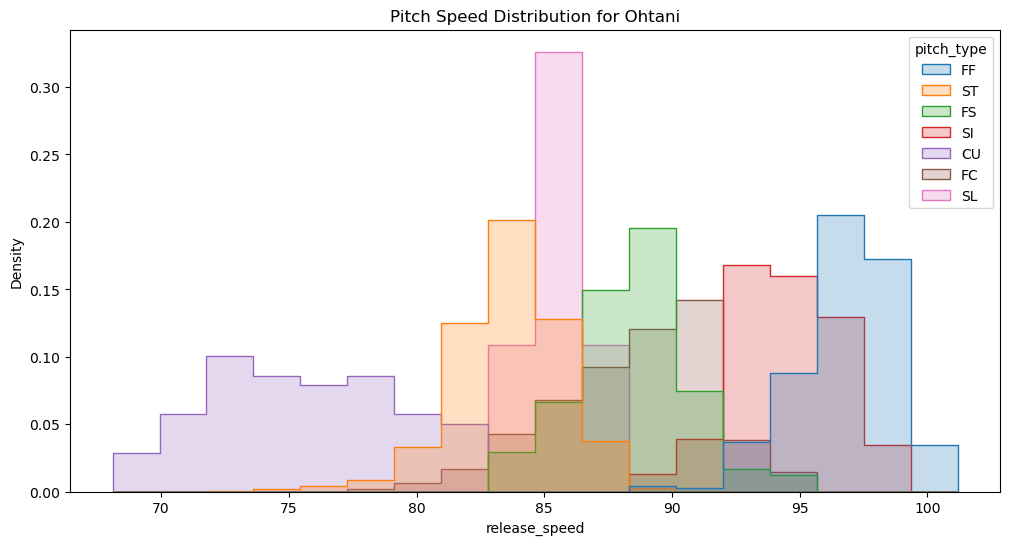

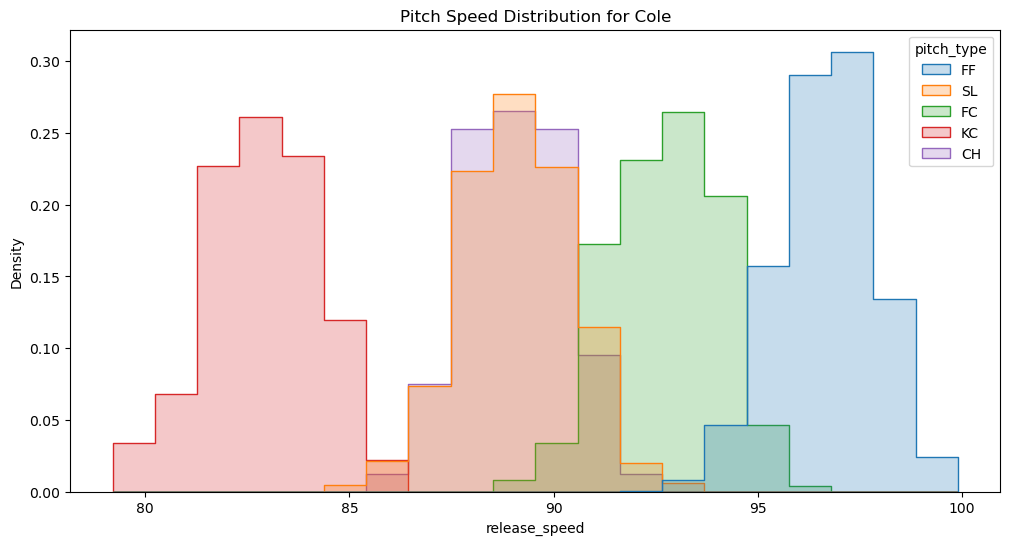

In [16]:
import seaborn as sns

# Distribution of pitch speeds for Ohtani
plt.figure(figsize=(12, 6))
sns.histplot(Ohtani, x='release_speed', hue='pitch_type', element='step', stat='density', common_norm=False)
plt.title('Pitch Speed Distribution for Ohtani')
plt.show()

# Distribution of pitch speeds for Cole
plt.figure(figsize=(12, 6))
sns.histplot(Cole, x='release_speed', hue='pitch_type', element='step', stat='density', common_norm=False)
plt.title('Pitch Speed Distribution for Cole')
plt.show()

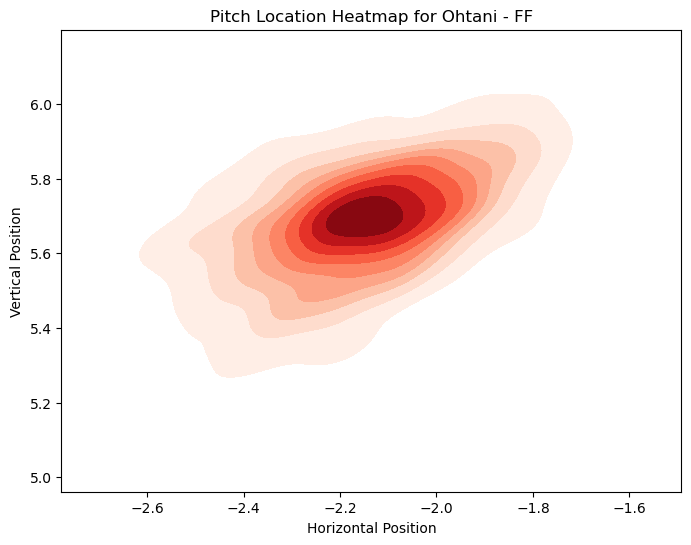

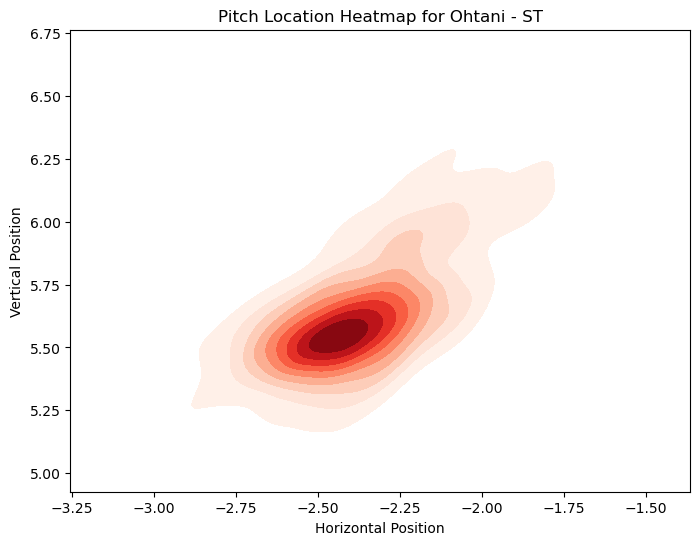

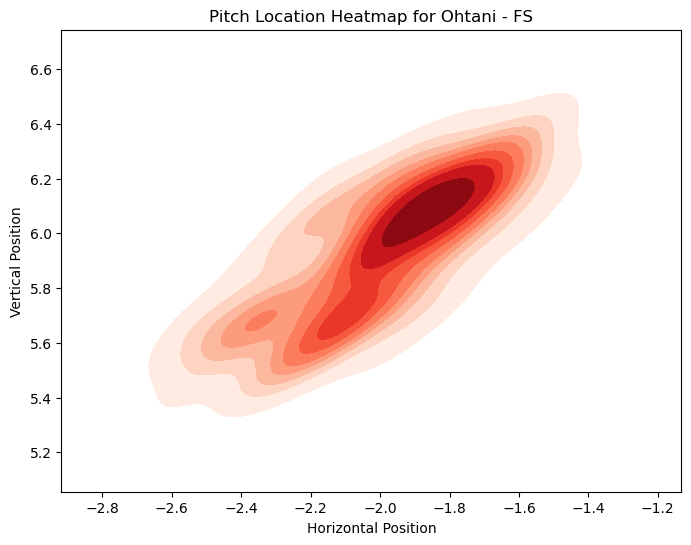

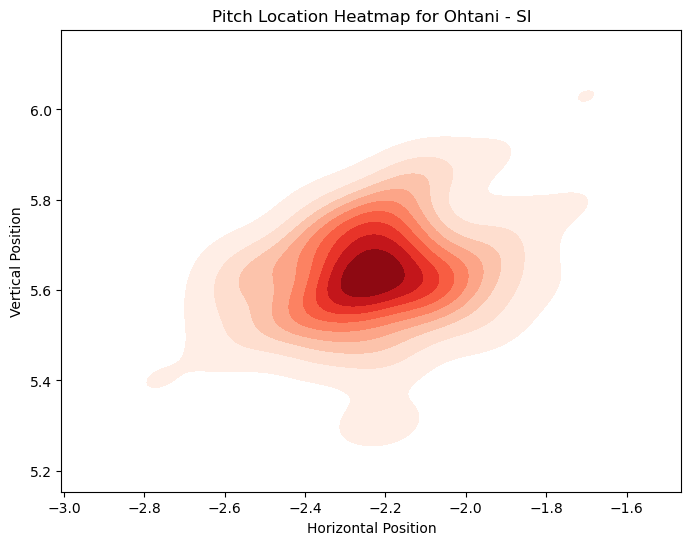

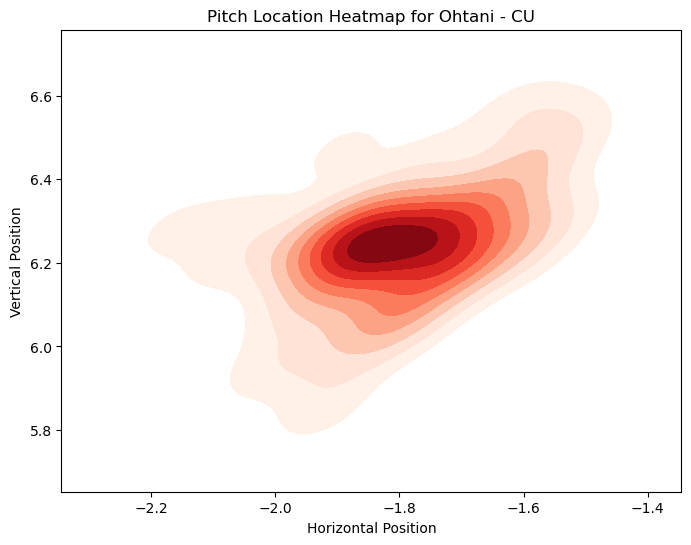

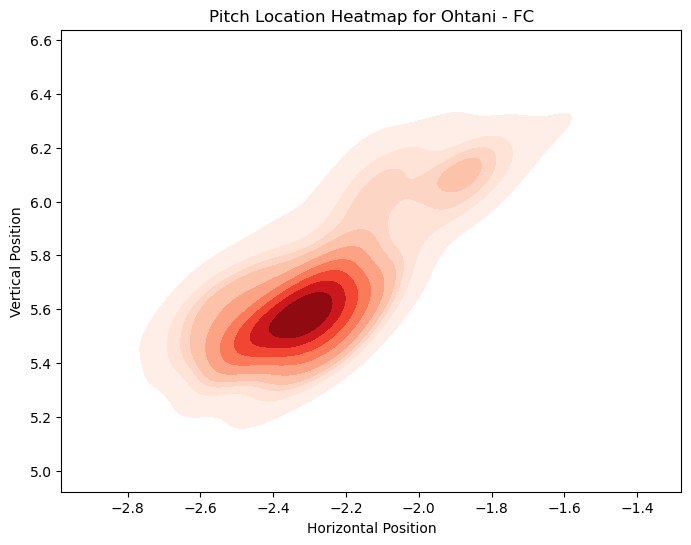

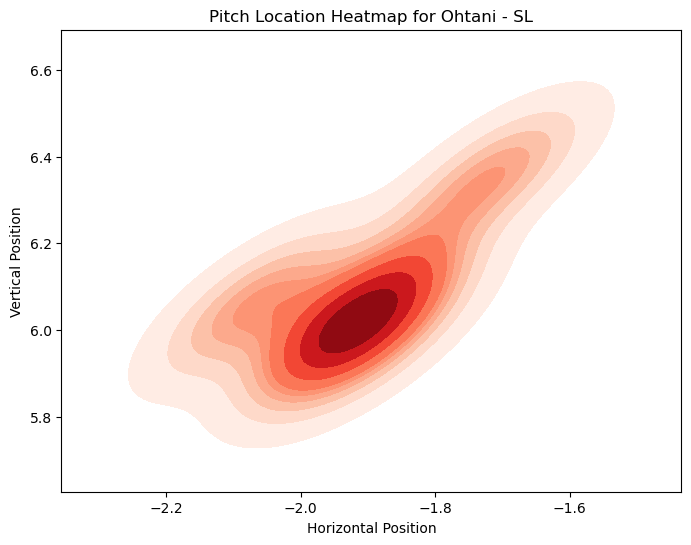

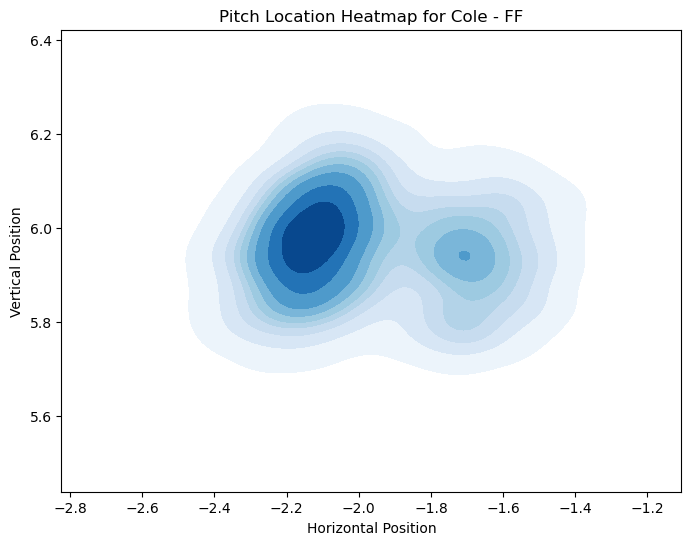

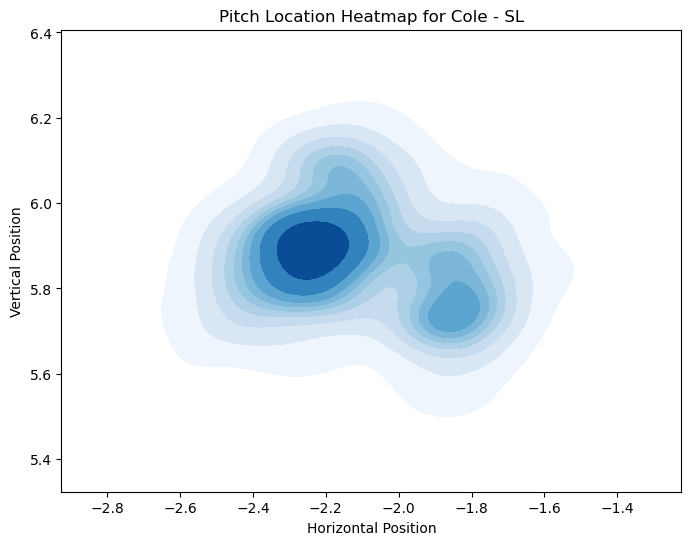

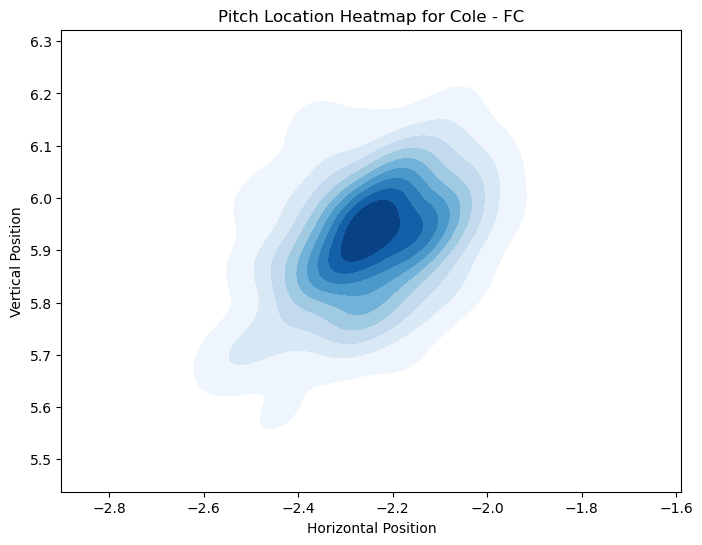

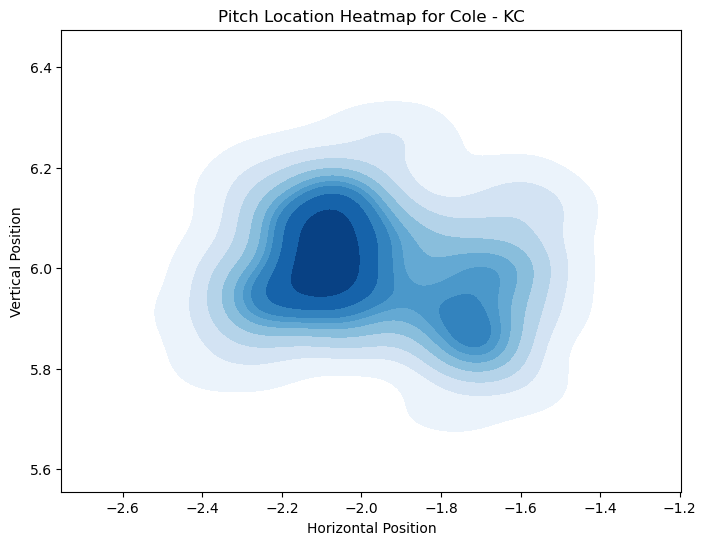

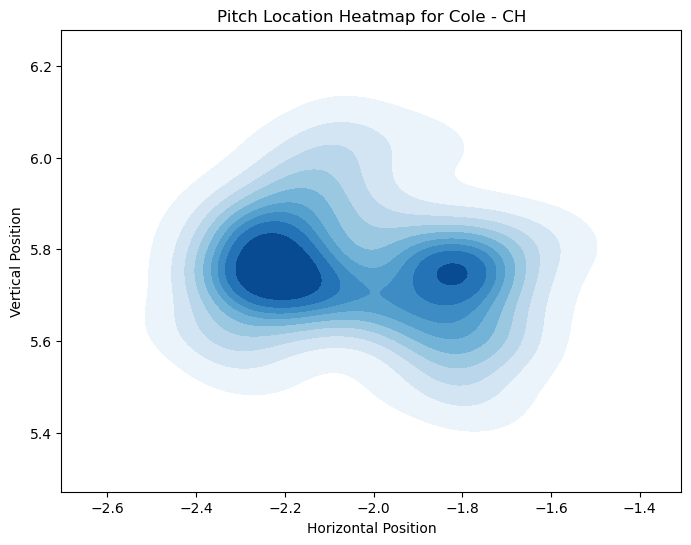

In [21]:
# Heatmaps of pitch locations for Ohtani
import matplotlib.pyplot as plt
import seaborn as sns

for pitch in Ohtani['pitch_type'].unique():
    plt.figure(figsize=(8, 6))
    pitch_data = Ohtani[Ohtani['pitch_type'] == pitch]
    sns.kdeplot(x=pitch_data['release_pos_x'], y=pitch_data['release_pos_z'], cmap='Reds', fill=True)
    plt.title(f'Pitch Location Heatmap for Ohtani - {pitch}')
    plt.xlabel('Horizontal Position')
    plt.ylabel('Vertical Position')
    plt.show()

# Heatmaps of pitch locations for Cole
for pitch in Cole['pitch_type'].unique():
    plt.figure(figsize=(8, 6))
    pitch_data = Cole[Cole['pitch_type'] == pitch]
    sns.kdeplot(x=pitch_data['release_pos_x'], y=pitch_data['release_pos_z'], cmap='Blues', fill=True)
    plt.title(f'Pitch Location Heatmap for Cole - {pitch}')
    plt.xlabel('Horizontal Position')
    plt.ylabel('Vertical Position')
    plt.show()


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact

# Sample data for demonstration, replace with actual data loading
# Ohtani = pd.read_csv("ohtani_data.csv")
# Cole = pd.read_csv("cole_data.csv")

# Create a list of unique pitch types for both players
ohtani_pitch_types = Ohtani['pitch_type'].unique()
cole_pitch_types = Cole['pitch_type'].unique()
all_pitch_types = sorted(set(ohtani_pitch_types).union(cole_pitch_types))

# Define a function to plot the heatmaps
def plot_heatmaps(pitch_type):
    # Plot heatmap for Ohtani
    if pitch_type in ohtani_pitch_types:
        pitch_data_ohtani = Ohtani[Ohtani['pitch_type'] == pitch_type]
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.kdeplot(x=pitch_data_ohtani['release_pos_x'], y=pitch_data_ohtani['release_pos_z'], cmap='Reds', fill=True)
        plt.title(f'Pitch Location Heatmap for Ohtani - {pitch_type}')
        plt.xlabel('Horizontal Position')
        plt.ylabel('Vertical Position')
    
    # Plot heatmap for Cole
    if pitch_type in cole_pitch_types:
        pitch_data_cole = Cole[Cole['pitch_type'] == pitch_type]
        plt.subplot(1, 2, 2)
        sns.kdeplot(x=pitch_data_cole['release_pos_x'], y=pitch_data_cole['release_pos_z'], cmap='Blues', fill=True)
        plt.title(f'Pitch Location Heatmap for Cole - {vpitch_type}')
        plt.xlabel('Horizontal Position')
        plt.ylabel('Vertical Position')
    
    plt.tight_layout()
    plt.show()

# Create a dropdown widget for pitch types
pitch_type_dropdown = widgets.Dropdown(
    options=all_pitch_types,
    value=all_pitch_types[0],
    description='Pitch Type:',
)

# Use ipywidgets interact to update heatmaps based on dropdown selection
interact(plot_heatmaps, pitch_type=pitch_type_dropdown)


interactive(children=(Dropdown(description='Pitch Type:', options=('CH', 'CU', 'FC', 'FF', 'FS', 'KC', 'SI', '…

<function __main__.plot_heatmaps(pitch_type)>

In [33]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go



# Filter out rows with missing descriptions
filtered_df = Ohtani.dropna(subset=['description'])

# Create the interactive scatter plot
fig = px.scatter(
    filtered_df,
    x='release_pos_z',
    y='release_speed',
    color='description',
    title='Release Speed vs Release Position by Description for Shohei Ohtani',
    labels={
        'release_speed': 'Release Speed',
        'release_pos_z': 'Release Position Z',
        'description': 'Pitch Description'
    }
)

# Update layout to add hover interaction
fig.update_traces(marker=dict(size=10, opacity=0.6), 
                  selector=dict(mode='markers'))

# Add custom hover interaction
fig.update_layout(
    hovermode='closest',
    hoverlabel=dict(bgcolor="white", font_size=16)
)

fig.show()

In [34]:
import plotly.graph_objects as go
from ipywidgets import interact, Dropdown

# Create a list of unique pitch types for both players
ohtani_pitch_types = Ohtani['pitch_type'].unique()
cole_pitch_types = Cole['pitch_type'].unique()
all_pitch_types = sorted(set(ohtani_pitch_types).union(cole_pitch_types))

# Define a function to create 3D scatter plots
def plot_3d_heatmaps(pitch_type):
    fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]], subplot_titles=[f'Ohtani - {pitch_type}', f'Cole - {pitch_type}'])
    
    if pitch_type in ohtani_pitch_types:
        pitch_data_ohtani = Ohtani[Ohtani['pitch_type'] == pitch_type]
        fig.add_trace(
            go.Scatter3d(
                x=pitch_data_ohtani['release_pos_x'], 
                y=pitch_data_ohtani['release_pos_z'], 
                z=pitch_data_ohtani['release_speed'], 
                mode='markers',
                marker=dict(size=4, color=pitch_data_ohtani['release_speed'], colorscale='Reds', opacity=0.8),
                name=f'Ohtani - {pitch_type}'
            ),
            row=1, col=1
        )
    
    if pitch_type in cole_pitch_types:
        pitch_data_cole = Cole[Cole['pitch_type'] == pitch_type]
        fig.add_trace(
            go.Scatter3d(
                x=pitch_data_cole['release_pos_x'], 
                y=pitch_data_cole['release_pos_z'], 
                z=pitch_data_cole['release_speed'], 
                mode='markers',
                marker=dict(size=4, color=pitch_data_cole['release_speed'], colorscale='Blues', opacity=0.8),
                name=f'Cole - {pitch_type}'
            ),
            row=1, col=2
        )
    
    fig.update_layout(
        height=600, width=1200,
        title_text=f'3D Pitch Location and Speed: {pitch_type}',
        showlegend=False
    )
    
    fig.show()

# Create a dropdown widget for pitch types
pitch_type_dropdown = Dropdown(
    options=all_pitch_types,
    value=all_pitch_types[0],
    description='Pitch Type:',
)

# Use ipywidgets interact to update 3D plots based on dropdown selection
interact(plot_3d_heatmaps, pitch_type=pitch_type_dropdown)


interactive(children=(Dropdown(description='Pitch Type:', options=('CH', 'CU', 'FC', 'FF', 'FS', 'KC', 'SI', '…

<function __main__.plot_3d_heatmaps(pitch_type)>

In [35]:
import pandas as pd
import plotly.graph_objects as go

# Filter out rows with missing descriptions
filtered_df = Ohtani.dropna(subset=['description'])

# Create the interactive 3D scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=filtered_df['release_pos_x'],
    y=filtered_df['release_pos_z'],
    z=filtered_df['release_speed'],
    mode='markers',
    marker=dict(
        size=5,
        color=filtered_df['release_speed'], # Set color to release speed for gradient
        colorscale='Viridis', # Choose a colorscale
        opacity=0.8
    ),
    text=filtered_df['description'], # Use pitch description for hover text
    hoverinfo='text'
))

# Update layout to add title and labels
fig.update_layout(
    title='3D Scatter Plot of Release Speed and Position for Shohei Ohtani',
    scene=dict(
        xaxis_title='Release Position X',
        yaxis_title='Release Position Z',
        zaxis_title='Release Speed'
    ),
    hovermode='closest'
)

# Show the plot
fig.show()
